# importing packages 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot,plot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [7]:
#!pip install scikit-learn

In [8]:
#reading the csv files
df=pd.read_csv("Ecommerce Customers")

In [9]:
#checking the top 5 values of the data set
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
#checking the shape of the data set
df.shape

(500, 8)

In [11]:
#the shape of the data set is 500 rows and 8 columns
#now check the tail values do the data set
df.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [12]:
#In the above dat set the target variable is Yeary Amount spent 
#now check all the column names of the data set
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
#now check the data types of the data set
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [14]:
#In these one our mainaim is to predict the yearly amount spent baesd on the other columns 


In [15]:
#here we are doing the regression analysis the columns like Email,Address, And avatar will not be usefull for these project so we acn drop those columns from the data swt
df.drop(['Email','Address','Avatar'],axis=1,inplace=True)

In [16]:
#now check our new dat set
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [17]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [19]:
#now check the is there are any null values in the data set
df.isna().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [20]:
#there are no values inthe data set

In [21]:
#now let us perform the Eda data visualizations on it

# Data Visualization

In [29]:
import ipywidgets as widgets

In [30]:
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

<Axes: xlabel='Avg. Session Length', ylabel='Yearly Amount Spent'>

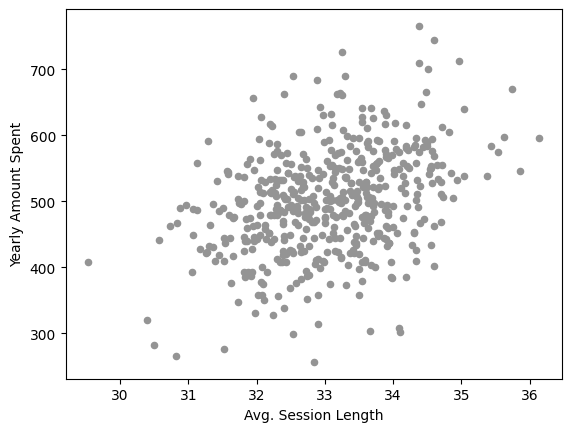

In [32]:
df.plot.scatter(x='Avg. Session Length',y='Yearly Amount Spent',color='#949494')

In [36]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<Axes: xlabel='Avg. Session Length', ylabel='Yearly Amount Spent'>

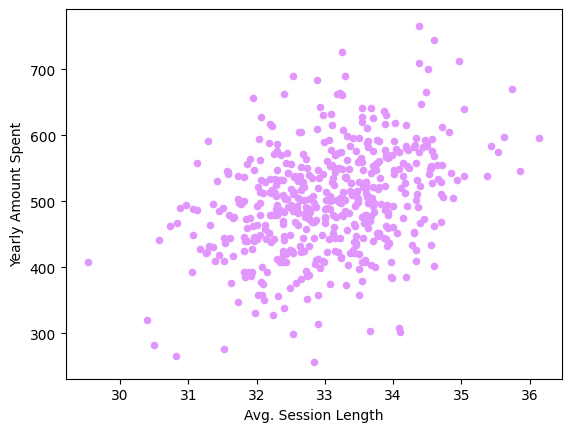

In [38]:
df.plot.scatter(x='Avg. Session Length',y='Yearly Amount Spent',color='#e196fd')

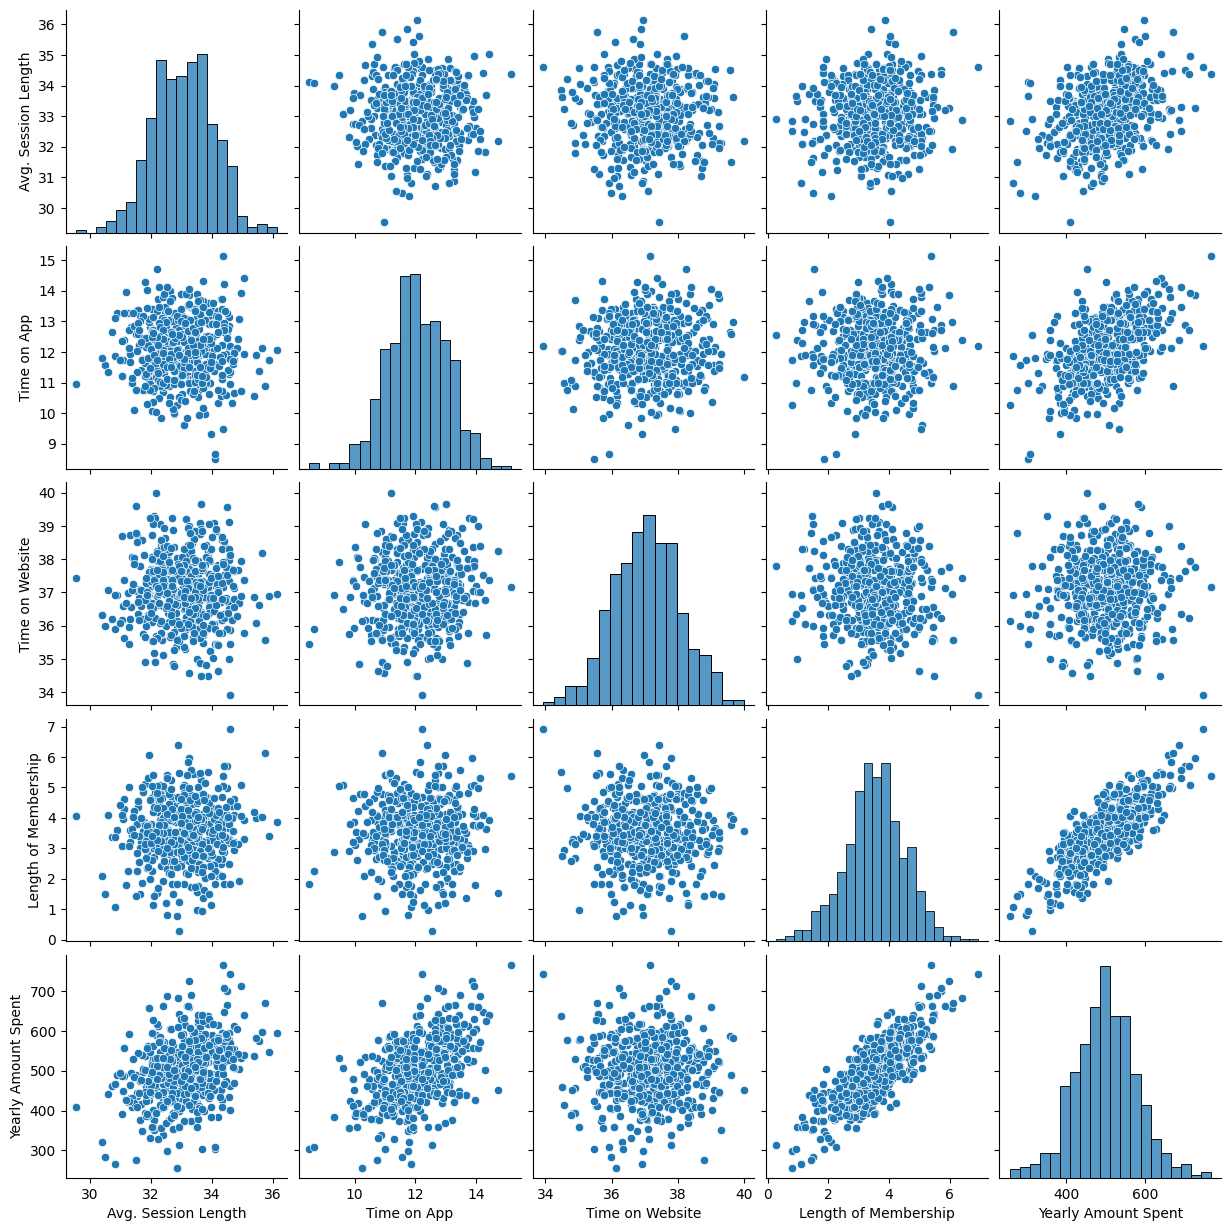

In [35]:
#now let us plot the pairplot 
sns.pairplot(df)


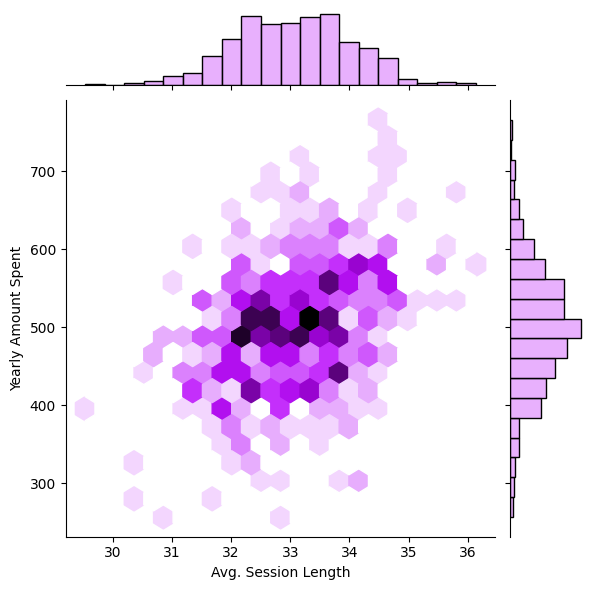

In [42]:
#now let us see the jointplot
sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',data=df,color='#e196fd',kind='hex')

In [43]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

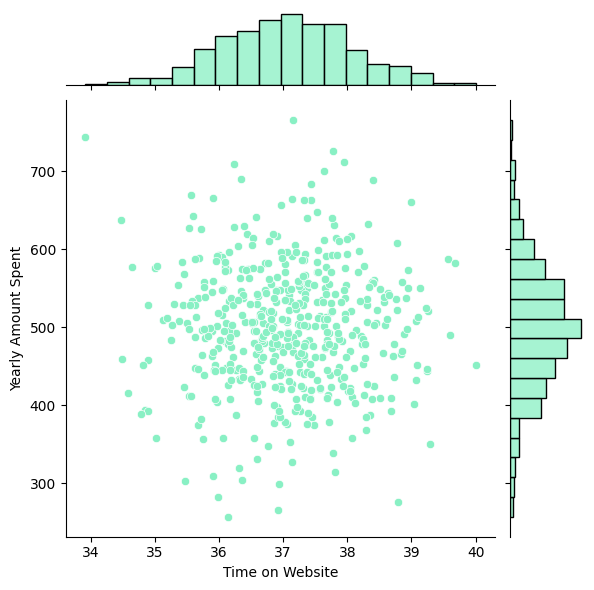

In [45]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,color="#89f0c4",kind='scatter')

In [46]:
#now let us draw the lmplot 

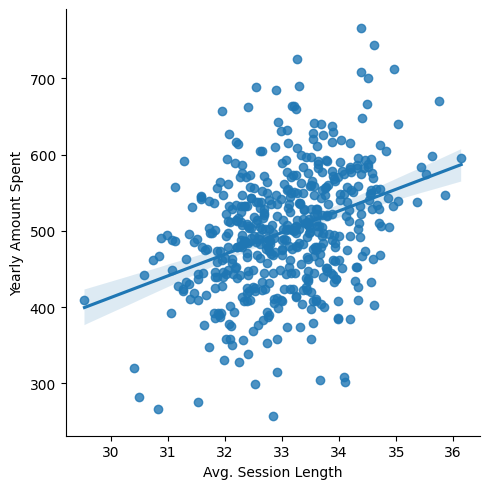

In [49]:
sns.lmplot(x='Avg. Session Length',y='Yearly Amount Spent',data=df)

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
df.iplot(kind='hist',x='Avg. Session Length')

<Axes: xlabel='Avg. Session Length', ylabel='Density'>

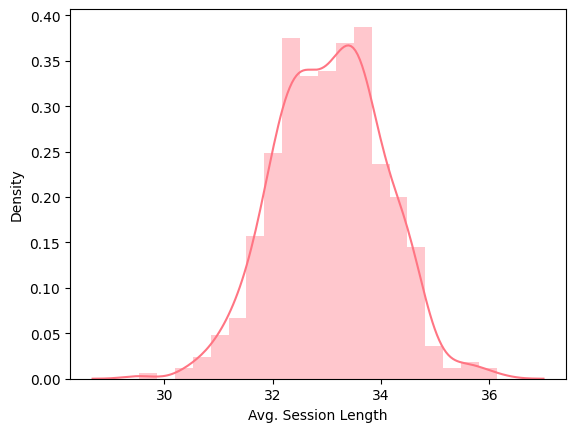

In [57]:
#now let us draw the distributiion plots 
sns.distplot(df['Avg. Session Length'],color='#ff7583')

In [63]:
df.iplot(kind='scatter',mode='markers')

In [64]:
#now let us split our data set into training and testing 
x=df.drop('Yearly Amount Spent',axis=1)
y=df['Yearly Amount Spent']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [66]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(350, 4)
(350,)
(150, 4)
(150,)


In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [69]:
#our algorithms have been trained 
#now let us predict the results 
pred=ln.predict(x_test)

In [70]:
pred

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

In [71]:
#now let us get the coffecients
ln.intercept_

-1047.9327822502391

In [72]:
ln.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [86]:
#Now let us keep these things in the data frame
data_name=pd.DataFrame(ln.coef_,x.columns,columns=["coeficents"])

In [87]:
data_name

,coeficents
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [88]:
#now let us calucate the mae
mean_absolute_error(y_test,pred)

7.228148653430811

In [89]:
mean_squared_error(y_test,pred)

79.81305165097385

In [90]:
np.sqrt(mean_squared_error(y_test,pred))

8.9338150669786

In [91]:
r2_score(y_test,pred)

0.9890046246741235

<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

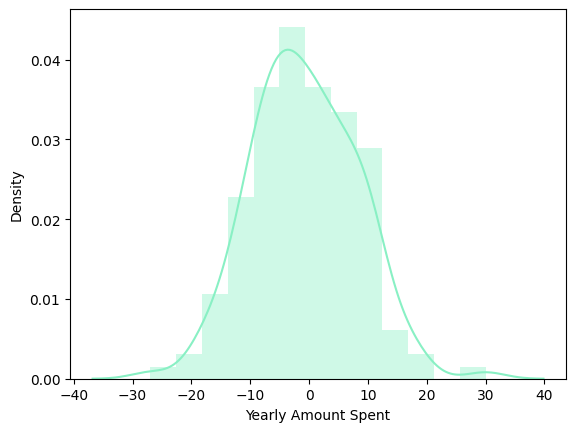

In [93]:
sns.distplot((y_test-pred),color='#89f0c4')